In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html)**. 

Imports
------

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows. 

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. 

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [3]:
spotify_df = pd.read_csv("data/spotify.csv", index_col = 0)
print(spotify_df)

...

      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechi

Ellipsis

In [4]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Number of training and test examples
rubric={autograde}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [5]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [6]:
# Please provide numeric values
n_train_samples = len(train_df)
n_test_samples = len(test_df)

...

Ellipsis

In [7]:
...
n_train_samples

1613

In [8]:
...
n_test_samples

404

In [9]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

#### 1.3
rubric={autograde}

**Your tasks:**

1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
spotify_summary = train_df.describe()
print(spotify_summary)

...

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

Ellipsis

In [11]:
feature_ranges = spotify_summary.loc["max"] - spotify_summary.loc["min"]
print(feature_ranges)

smallest_range_feature = feature_ranges.idxmin()
print(smallest_range_feature)

...

acousticness             0.993997
danceability             0.836000
duration_ms         988585.000000
energy                   0.981400
instrumentalness         0.976000
key                     11.000000
liveness                 0.950200
loudness                30.364000
mode                     1.000000
speechiness              0.598900
tempo                  171.472000
time_signature           4.000000
valence                  0.936700
target                   1.000000
dtype: float64
speechiness


Ellipsis

In [12]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 
rubric={points}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

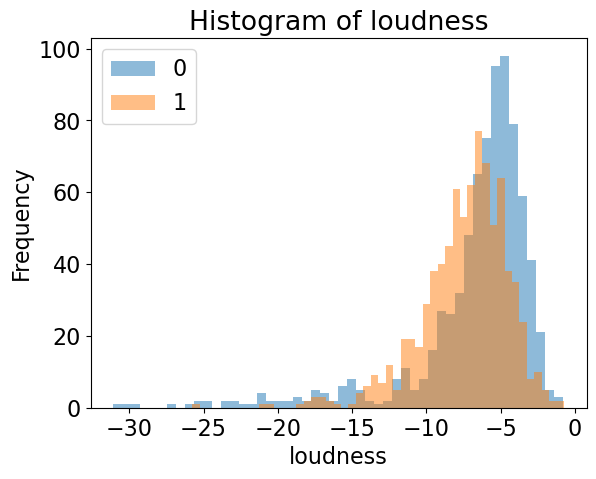

In [13]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 5

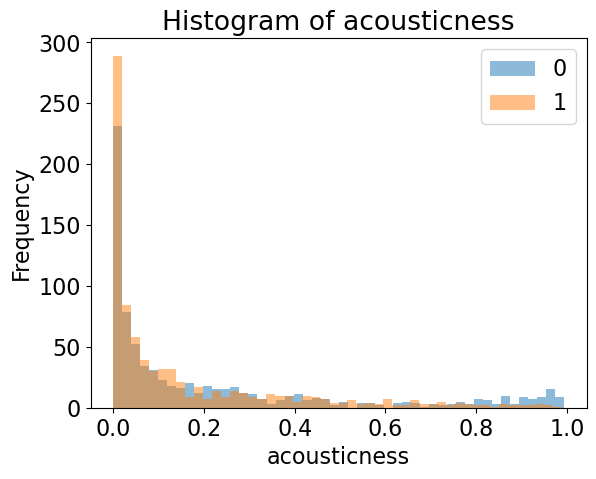

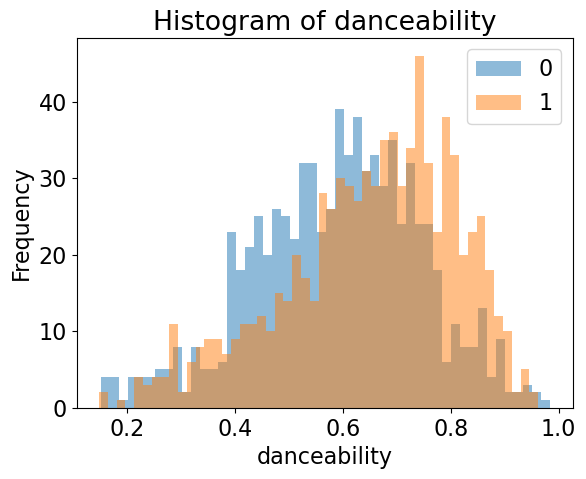

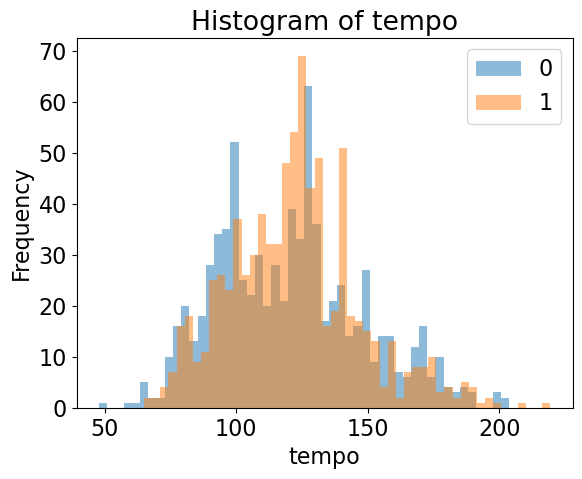

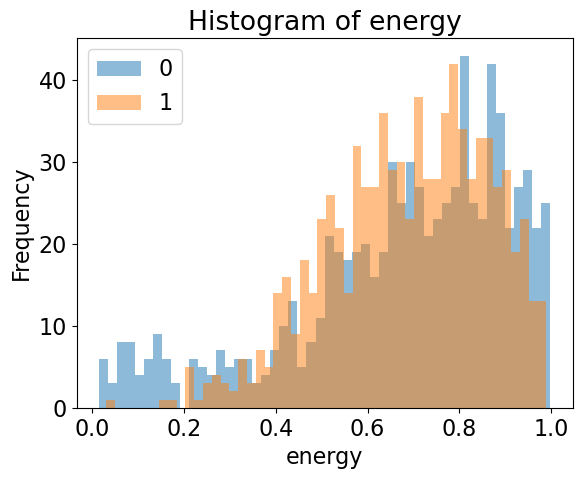

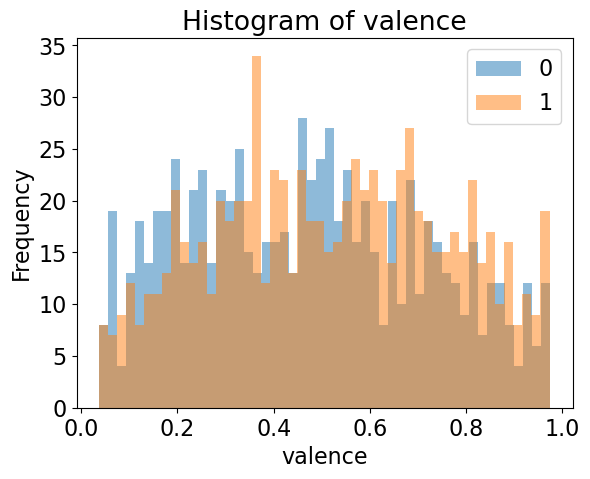

Ellipsis

In [14]:
features = ["acousticness", "danceability", "tempo", "energy", "valence"]
for feat in features:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

If a feature's histograms are identical for the two target classes, this feature may not provide predictive values and other useful information for the target classes. However, we cannot determine the usefulness of a feature by only its histogram since there are other factors may affect its predictive value, for example, the predictive ability can be improved when using this feature combines with other features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 
rubric={reasoning}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

Yes, I think these features could be useful in predicting whether the user liked the song or not, even though they are text data and hard to use them in our model. For example, the song_title can reveal the genre of the song so that we can track the popularity of the specific genre to make prediction; and for the artist, the audiences may be a fan of the artist and like all the artist's songs. 

Using these text data in our model is difficult, because not all machine learning algorithms can directly handle text data, so we have to pre-process our data before applying them to our model.

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1
rubric={autograde}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [15]:
X_train = train_df.drop(columns = ["song_title", "artist", "target"])
print(X_train)
y_train = train_df["target"]
print(y_train)
X_test = test_df.drop(columns = ["song_title", "artist", "target"])
y_test = test_df["target"]

...

      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
260       0.018100         0.932       192773   0.819          0.000007    8   
1286      0.083900         0.459       256933   0.561          0.000000    7   
1344      0.001920         0.482       198947   0.968          0.000454    6   
1197      0.039000         0.673       229507   0.758          0.000000    7   
119       0.024400         0.746       222093   0.873          0.000000    7   
...            ...           ...          ...     ...               ...  ...   
1833      0.003880         0.492       186867   0.797          0.000000   11   
799       0.062500         0.758       252333   0.629          0.000144    7   
124       0.674000         0.462       226333   0.449          0.000632    0   
538       0.000183         0.596       178800   0.628          0.007670    5   
1012      0.134000         0.603       246685   0.640          0.000000    1   

      liveness  loudness  mode  speechi

Ellipsis

In [16]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2.2
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [17]:
spotify_tree = DecisionTreeClassifier(random_state = 123)
spotify_tree.fit(X_train, y_train)
...

Ellipsis

In [18]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

### 2.3 
rubric={autograde}

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [19]:
pred = spotify_tree.predict(X_train.iloc[[0]])[0]
print(pred)
print(y_train.iloc[0])

...

1
1


Ellipsis

In [20]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

### 2.4
rubric={autograde}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 2

In [21]:
cv_scores = cross_val_score(spotify_tree, X_train, y_train, cv = 10)
print(cv_scores)
mean_cv_score = np.mean(cv_scores)
print(mean_cv_score)

...

[0.68518519 0.63580247 0.64197531 0.70807453 0.72670807 0.60869565
 0.71428571 0.71428571 0.67701863 0.70807453]
0.6820105820105821


Ellipsis

In [22]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5
rubric={autograde}

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 3

In [23]:
scores = cross_validate(spotify_tree, X_train, y_train, cv = 10, return_train_score = True)
print(scores)
scores_df = pd.DataFrame(scores)
print(scores_df)

...

{'fit_time': array([0.01390934, 0.01394153, 0.01324129, 0.01256633, 0.01200914,
       0.01293063, 0.01100016, 0.01199627, 0.01304364, 0.01358819]), 'score_time': array([0.00216746, 0.00162315, 0.00099969, 0.00103116, 0.00186133,
       0.00199103, 0.00096869, 0.00200009, 0.00199986, 0.0010004 ]), 'test_score': array([0.68518519, 0.63580247, 0.64197531, 0.70807453, 0.72670807,
       0.60869565, 0.71428571, 0.71428571, 0.67701863, 0.70807453]), 'train_score': array([0.99931082, 0.99862164, 0.99931082, 0.99862259, 0.99862259,
       0.99862259, 0.99862259, 0.99931129, 0.99931129, 0.99862259])}
   fit_time  score_time  test_score  train_score
0  0.013909    0.002167    0.685185     0.999311
1  0.013942    0.001623    0.635802     0.998622
2  0.013241    0.001000    0.641975     0.999311
3  0.012566    0.001031    0.708075     0.998623
4  0.012009    0.001861    0.726708     0.998623
5  0.012931    0.001991    0.608696     0.998623
6  0.011000    0.000969    0.714286     0.998623
7  0.011

Ellipsis

In [24]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.6
rubric={points}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 2

1. The cross-validation informs the evaluation of how well the model generalize unseen data. The mean cross validation score may not be trustworthy when there is a big gap between training score and cross-validation score.
2. From the printed results of cross-validation scores and train scores below, we can see that there is a significant difference between the training scores and the cross-validation scores. The training scores are a lot higher than cross-validation scores, this informs that the model is overfitting the training data and may not generalize unseen data well.

In [25]:
...
print(scores_df)

   fit_time  score_time  test_score  train_score
0  0.013909    0.002167    0.685185     0.999311
1  0.013942    0.001623    0.635802     0.998622
2  0.013241    0.001000    0.641975     0.999311
3  0.012566    0.001031    0.708075     0.998623
4  0.012009    0.001861    0.726708     0.998623
5  0.012931    0.001991    0.608696     0.998623
6  0.011000    0.000969    0.714286     0.998623
7  0.011996    0.002000    0.714286     0.999311
8  0.013044    0.002000    0.677019     0.999311
9  0.013588    0.001000    0.708075     0.998623


In [26]:
...
print(mean_cv_score)

0.6820105820105821


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [27]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 10

Ellipsis

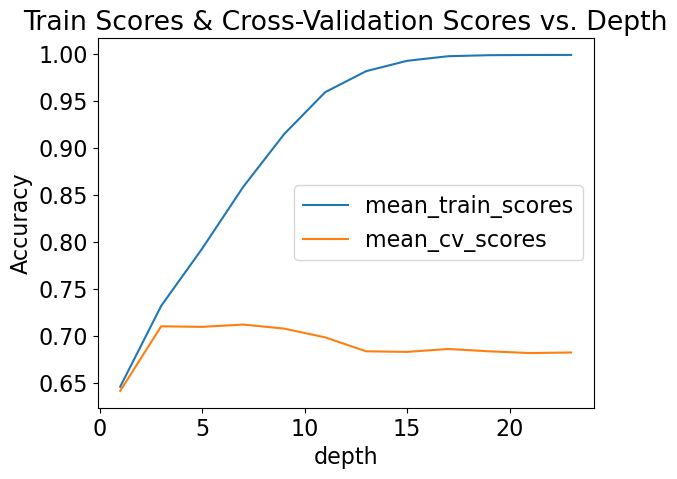

In [28]:
# max_depth_plot: the figure plotted for this exercise
# Adapted from lecture 3
results_dict = {
    "depth": [],
    "mean_train_scores": [],
    "mean_cv_scores": [],
}

for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth, random_state = 123)
    scores = cross_validate(model, X_train, y_train, cv = 10, return_train_score = True)
    results_dict["depth"].append(depth)
    results_dict["mean_train_scores"].append(np.mean(scores["train_score"]))
    results_dict["mean_cv_scores"].append(np.mean(scores["test_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
max_depth_plot = results_df[["mean_train_scores", "mean_cv_scores"]].plot()
plt.ylabel("Accuracy")
plt.title("Train Scores & Cross-Validation Scores vs. Depth")
...

In [29]:
max_depth_plot.legend().get_texts()[0].get_text()

'mean_train_scores'

In [30]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 `max_depth` and the fundamental tradeoff
rubric={reasoning}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

When changing to low max_depth, the train score and cross-validation score are approximately the same and it will lead to underfitting; when changing to high max_depth, the gap between train score and cross-validation score are also increasing, the train error will be even smaller than the expected best score, and it will lead to overfitting; when changing to "sweet spot" of max_depth, we can avoid overfitting and underfitting, the train score and cross-validation score are reasonably high and close to each other.

<!-- END QUESTION -->

<br><br>

### 3.3 Picking a reasonable value for `max_depth`
rubric={autograde}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 2

In [31]:
best_max_depth = 7

...

Ellipsis

In [32]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

### 3.4 Final assessment on the test set
rubric={autograde}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**
1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 3

In [33]:
spotify_tree = DecisionTreeClassifier(max_depth = best_max_depth, random_state = 123)
spotify_tree.fit(X_train, y_train)
test_score = spotify_tree.score(X_test, y_test)
print(test_score)
...

0.6881188118811881


Ellipsis

In [34]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Analysis
rubric={points}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 5

In [35]:
print(mean_cv_score)
print(test_score)

0.6820105820105821
0.6881188118811881


1. Compare to the mean cross-validation score, our test score is pretty close to it. This means our model with the best max_depth with generalize well to unseen data.
2. Because the simply picking the value of max_depth that gives the best accuracy on the training data will lead to overfitting, which means that our model will rely too much on the training data and may not generalize to unseen data well.
3. The max_depth I chose may not generalize to other "spotify" datasets, because different datasets may have different distributions and patterns, we will have to re-evaluate and choose new value of hyperparameters when we get a new datasets


<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 3

1. The "true" case is when the first feature less than 5.5, the "false" case is when the first feature greater than 5.5. Therefore, when the X_first_col = [5, 4, 2], we predict it's in "true" case; when the X_first_col = [10, 9, 9], we predict it's in "false" case.
2. As y = [-1, -1, +1, +1, +1, +1], let's say -1 represent "true" case, +1 represent "false" case. From question 1, we have 3 "true" case, and 3 "false" case. Therefore, we can say that
predicted: [true, true, true, false, false, false]
real: [true, true, false, false, false, false]

There is only one mis-prediction, therefore, the train accuracy will be 5/6
3. No, because there is no other way to compare numbers to divide the target into two cases with the given features.

<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/117814). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

Congratulations on working with your first machine learning model! Well done 👏👏!